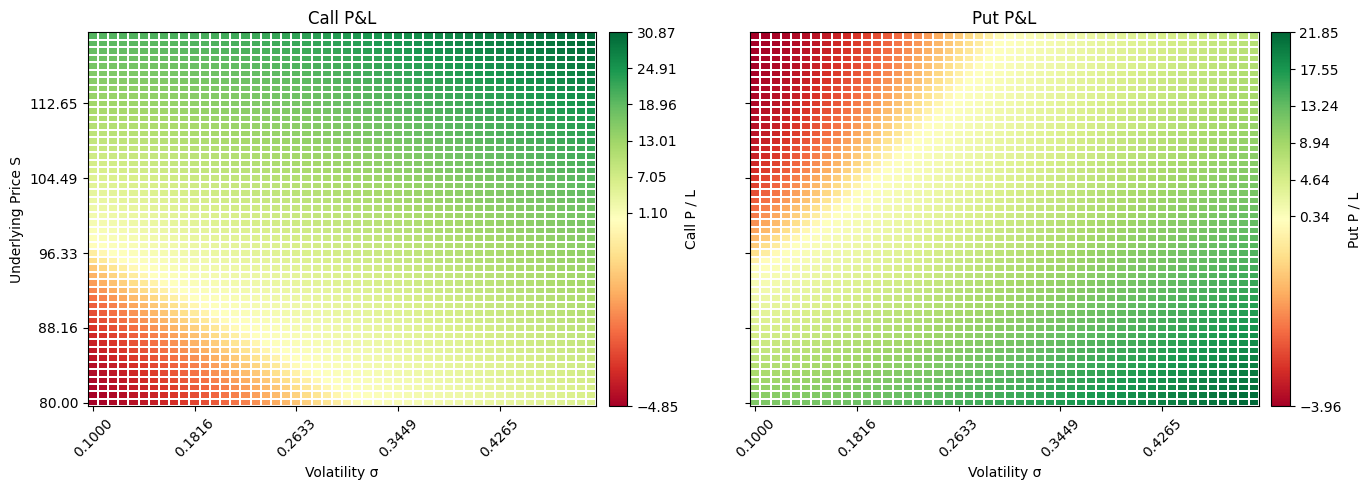

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import TwoSlopeNorm


# define black scholes function

def black_scholes(S, K, T, r, sigma, option='call'):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if option == 'call':
        return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2) #calls profit from upper tail
    else:
        return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1) #put formula where probability region flips

# dummy parameters
K          = 100
r          = 0.05
call_cost  = 5.00
put_cost   = 4.00

# define values over which heatmap is created
S_vals     = np.linspace(80, 120, 50)
sigma_vals = np.linspace(0.10, 0.50, 50)

#S0 is stock price. sigma0 is volatility.
call_rows = []
for S0 in S_vals:
    row = []
    for sigma0 in sigma_vals:
        price = black_scholes(S0, K, T, r, sigma0, 'call')
        pnl   = price - call_cost
        row.append(pnl) #append pnl value to list
    call_rows.append(row)
call_pnl = np.array(call_rows)

#same logic for put pnl
put_rows = []
for S0 in S_vals:
    row = []
    for sigma0 in sigma_vals:
        price = black_scholes(S0, K, T, r, sigma0, 'put')
        pnl   = price - put_cost
        row.append(pnl)
    put_rows.append(row)
put_pnl = np.array(put_rows)

#grab first and last element
S_min, S_max       = S_vals[0], S_vals[-1]
sigma_min, sigma_max = sigma_vals[0], sigma_vals[-1]

# build meshgrid
X, Y = np.meshgrid(sigma_vals, S_vals)

# set lower and upper bounds and also center at zero
vmin_call, vmax_call = call_pnl.min(), call_pnl.max()
norm_call = TwoSlopeNorm(vmin=vmin_call, vcenter=0, vmax=vmax_call)

vmin_put, vmax_put = put_pnl.min(), put_pnl.max()
norm_put = TwoSlopeNorm(vmin=vmin_put, vcenter=0, vmax=vmax_put)

cmap = 'RdYlGn'

# common y axis; create maps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# call heatmap
pcm1 = ax1.pcolormesh(
    X, Y, call_pnl,
    cmap=cmap, norm=norm_call,
    shading='auto',
    edgecolors='white', linewidth=0.2
)
ax1.set_title("Call P&L")
ax1.set_xlabel("Volatility σ")
ax1.set_ylabel("Underlying Price S")
ax1.set_xticks(sigma_vals[::10])
ax1.set_yticks(S_vals[::10])
ax1.tick_params(axis='x', rotation=45)

cbar1 = fig.colorbar(pcm1, ax=ax1, pad=0.02, label="Call P / L")
cbar1.set_ticks(np.linspace(vmin_call, vmax_call, 7))

# put heatmap
pcm2 = ax2.pcolormesh(
    X, Y, put_pnl,
    cmap=cmap, norm=norm_put,
    shading='auto',
    edgecolors='white', linewidth=0.2
)
ax2.set_title("Put P&L")
ax2.set_xlabel("Volatility σ")
ax2.set_xticks(sigma_vals[::10])
ax2.tick_params(axis='x', rotation=45)

cbar2 = fig.colorbar(pcm2, ax=ax2, pad=0.02, label="Put P / L")
cbar2.set_ticks(np.linspace(vmin_put, vmax_put, 7))

plt.tight_layout()
plt.show()